In [1]:
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

import requests
from io import BytesIO
from PIL import Image
import numpy as np

from PIL import Image

import imgkit

In [2]:
# this makes our figures bigger
pylab.rcParams['figure.figsize'] = 20, 12

In [3]:
from maskrcnn_benchmark.config import cfg
from my_coco_predictor import COCODemo

In [4]:
config_file = "../output/orig_COCO_orig_resnet/config.yml";


# update the config options with the config file
cfg.merge_from_file(config_file)
# manual override some options
cfg.merge_from_list(["MODEL.DEVICE", "cuda"])

In [ ]:
coco_demo = COCODemo(
    cfg,
    min_image_size=800,
    confidence_threshold=0.7,
    weight_loading = "../output/orig_COCO_orig_resnet/model_0050000.pth"
)

In [12]:
import IPython
from COCO_Image_Viewer import CocoDataset

annotation_path = "../maskrcnn_benchmark/data/datasets/my_dataset/resized_images/trainval.json"
image_dir = "../maskrcnn_benchmark/data/datasets/my_dataset/resized_images"

coco_dataset = CocoDataset(annotation_path, image_dir)


# Dataset info

In [13]:
coco_dataset.display_info()
coco_dataset.display_licenses()
coco_dataset.display_categories()

Dataset Info:
Licenses:
Categories:
  super_category: battery
    id 0: battery

  super_category: camera
    id 1: camera

  super_category: connector
    id 2: connector

  super_category: motherboard
    id 3: motherboard

  super_category: screw
    id 4: screw



In [14]:
def imshow(img):
    plt.imshow(img)
    plt.axis("off")
    
def imshow_gt(image_id):
    html = coco_dataset.display_image(image_id, use_url=False)
    IPython.display.HTML(html)

In [15]:
# from http://cocodataset.org/#explore?id=345434
image_id = 9

image = Image.open("../maskrcnn_benchmark/data/datasets/my_dataset/test_resized_images/" + coco_dataset.images[image_id]["file_name"])
image = np.array(image)

html = coco_dataset.display_image(image_id, use_url=False)
IPython.display.HTML(html)

Image:
  height: 480
  width: 640
  id: 9
  file_name: 19_color.png
  segmentations (18):
    49:blue:{'supercategory': 'screw', 'id': 4, 'name': 'screw'}
    50:purple:{'supercategory': 'screw', 'id': 4, 'name': 'screw'}
    51:red:{'supercategory': 'screw', 'id': 4, 'name': 'screw'}
    52:green:{'supercategory': 'screw', 'id': 4, 'name': 'screw'}
    53:orange:{'supercategory': 'screw', 'id': 4, 'name': 'screw'}
    54:salmon:{'supercategory': 'screw', 'id': 4, 'name': 'screw'}
    55:pink:{'supercategory': 'screw', 'id': 4, 'name': 'screw'}
    56:gold:{'supercategory': 'screw', 'id': 4, 'name': 'screw'}
    57:orchid:{'supercategory': 'screw', 'id': 4, 'name': 'screw'}
    58:slateblue:{'supercategory': 'screw', 'id': 4, 'name': 'screw'}
    59:limegreen:{'supercategory': 'screw', 'id': 4, 'name': 'screw'}
    60:seagreen:{'supercategory': 'screw', 'id': 4, 'name': 'screw'}
    61:darkgreen:{'supercategory': 'screw', 'id': 4, 'name': 'screw'}
    62:olive:{'supercategory': 'screw'

objectness =  torch.Size([1, 15, 50, 67])
rpn_box_regression =  torch.Size([1, 60, 50, 67])
achors = 
[[BoxList(num_boxes=50250, image_width=1066, image_height=800, mode=xyxy)]]
anhcor[0][0][[0]].bbox
tensor([ 328., -280.,  679.,  423.], device='cuda:0')
Labels =  [1, 5, 5, 5, 2, 5, 5, 5, 5, 5, 5, 5, 5, 2, 5, 5]
Labels = ['battery', 'screw', 'screw', 'screw', 'camera', 'screw', 'screw', 'screw', 'screw', 'screw', 'screw', 'screw', 'screw', 'camera', 'screw', 'screw']


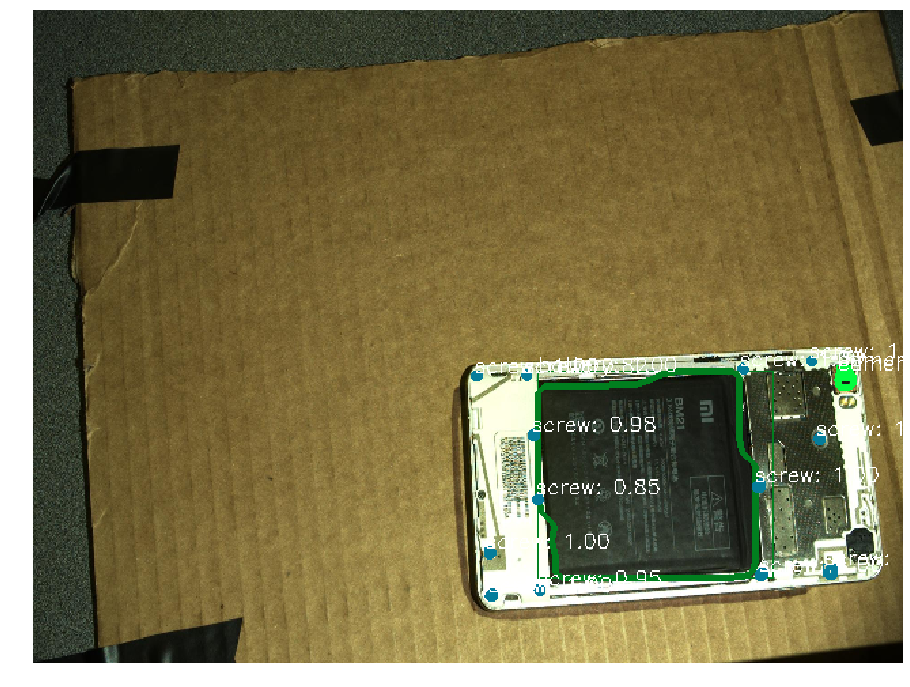

In [16]:
# compute predictions
predictions, p = coco_demo.run_on_opencv_image(image)
imshow(predictions)

In [23]:

for i in [p]:
    print ("Scores =", i.get_field('labels'))
    print ("Scores =", i.get_field('scores'))
    print ("BB = ", i.bbox)

Scores = tensor([1, 2, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5])
Scores = tensor([1.0000, 0.9996, 0.9024, 1.0000, 0.9516, 0.9986, 0.9999, 0.9964, 0.9974,
        0.9999, 0.9995, 0.9983, 0.9799, 0.8190, 0.6086, 0.8462, 0.1144, 0.9995,
        0.1029])
BB =  tensor([[371.3809, 265.0379, 544.5822, 417.6982],
        [591.2314, 264.5155, 603.2769, 277.3849],
        [591.9950, 261.6548, 601.7908, 270.8015],
        [575.2049, 312.2142, 580.3403, 318.3259],
        [370.2425, 422.8001, 374.2422, 428.7256],
        [519.4001, 261.0147, 524.5575, 265.4474],
        [332.7340, 395.5505, 338.3344, 401.0816],
        [570.6614, 255.2970, 573.9030, 259.2428],
        [530.9225, 346.3245, 536.0613, 352.6399],
        [334.0077, 427.0371, 340.2666, 433.2765],
        [324.0811, 266.0482, 327.9173, 269.9104],
        [533.2386, 412.0577, 538.2432, 417.3231],
        [366.0501, 309.3201, 369.8948, 315.1330],
        [360.3293, 266.1429, 364.3322, 270.1774],
        [579.9760, 407.8572, 584.

# Save ground trouth and prediction

In [85]:
html = coco_dataset.display_image(image_id, use_url=False)
html = html.replace('img src="../', 'img src="/home/q/kashapov/maskrcnn-benchmark/')
imgkit.from_string(html, 'ground_trouth.png')

Image:
  height: 480
  width: 640
  id: 4
  file_name: 6_color.png
  segmentations (8):
    20:blue:{'supercategory': 'camera', 'id': 1, 'name': 'camera'}
    21:purple:{'supercategory': 'connector', 'id': 2, 'name': 'connector'}
    22:red:{'supercategory': 'connector', 'id': 2, 'name': 'connector'}
    23:green:{'supercategory': 'connector', 'id': 2, 'name': 'connector'}
    24:orange:{'supercategory': 'screw', 'id': 4, 'name': 'screw'}
    25:salmon:{'supercategory': 'screw', 'id': 4, 'name': 'screw'}
    26:pink:{'supercategory': 'screw', 'id': 4, 'name': 'screw'}
    27:gold:{'supercategory': 'motherboard', 'id': 3, 'name': 'motherboard'}


OSError: wkhtmltoimage reported an error:
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
Loading page (1/2)
[>                                                           ] 0%[==============================>                             ] 50%[============================================================] 100%Rendering (2/2)                                                    
[>                                                           ] 0%[===============>                                            ] 25%Error: Could not save image                                       
[============================================================] 100%Done                                                               
Exit with code 1, due to unknown error.


In [68]:
im = Image.fromarray(predictions)
im.save("predictions.png", "PNG")